In [1]:
# Import relevant packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
from os import listdir
from os.path import isfile, join

# Create empty list to contain all information from daily stock trading details
daily_info_list = []

In [2]:
# Define a function to check the number of stocks which closed value is higher than open value for each day
def calculate_number_of_stock_closed_higher (csv_file):
    df = pd.read_csv(csv_file, header=None,delimiter=',')
    total_number_stock = len(df.index)
    #  k is the counter for the number of stocks which close price is higher to open price
    k = 0
    #  Compare all rows in the csv files, if the value on the fifth column (closed value) is higher than second column(open value), then count it
    for i in range(len(df)):
        if df.loc[i, 5] > df.loc[i, 2]:
            k = k +1
    return k,total_number_stock

In [3]:
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
# Define a function to find and analyze all csv files in the current directory
def add_daily_info_into_list():
    currentDirectory = os.getcwd()
    onlyfiles = [f for f in listdir(currentDirectory) if isfile(join(currentDirectory, f))]
    #  The line below has been set for function testing, uncomment it if you need to test the function     
    #  i= 0    
    #  For csv files in current directory,use its file name as date, find out the day of the week based on date
    for file in onlyfiles:
        day = datetime.datetime.strptime(file[0:8], '%Y%m%d').weekday()
    #  Record its date, in Year     
        daily_info_list.append([file[0:4],file[4:6],file[6:8],day_name[day],calculate_number_of_stock_closed_higher(file)[0],calculate_number_of_stock_closed_higher(file)[1]])
        #  The line below has been set for function testing, uncomment it if you need to test the function     
        #  i = i +1
        #   if i >100:
        #   break

        

In [4]:
def change_to_subfolder(folder_name):
    try:
        os.chdir('.//'+folder_name)
    except FileNotFoundError:
        currentDirectory = os.getcwd()
        print(currentDirectory)
        print("Folder Name '"+ folder_name +"'cannot be found please make sure you allocate this code file in the parent folder")

change_to_subfolder('1997-2006')
add_daily_info_into_list()  
os.chdir('..')

change_to_subfolder('2007-2012')
add_daily_info_into_list()  
os.chdir('..')

change_to_subfolder('2013-2016')
add_daily_info_into_list()  
os.chdir('..')

change_to_subfolder('2017jan-june')
add_daily_info_into_list()  
os.chdir('..')

change_to_subfolder('2017july-december')
add_daily_info_into_list()  
os.chdir('..')

change_to_subfolder('2018jan-june')
add_daily_info_into_list()  
os.chdir('..')

change_to_subfolder('2018july-dec')
add_daily_info_into_list()  
os.chdir('..')

change_to_subfolder('2019jan-june')
add_daily_info_into_list()  
os.chdir('..')

change_to_subfolder('2019july-dec')
add_daily_info_into_list()  
os.chdir('..')

In [5]:
# Update Column Index Name 
daily_info_df = pd.DataFrame(daily_info_list,columns = ['Year','Month','Date','Day','Number of Stocks Higher','Numbers of Other Stocks'])

In [6]:
# Group it by Days
daily_info_grouped_up = daily_info_df.groupby("Day")["Number of Stocks Higher"].sum().reindex(day_name)
daily_info_grouped_total = daily_info_df.groupby("Day")["Numbers of Other Stocks"].sum().reindex(day_name)

df = daily_info_grouped_up.div(daily_info_grouped_total)
df_cleaned = df.dropna()

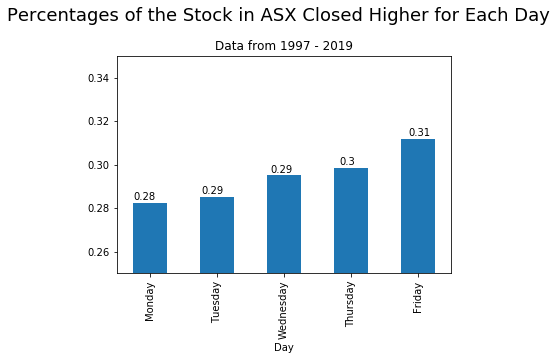

In [7]:
fig = plt.figure()
ax = plt.subplot(111)
df_cleaned.plot(kind="bar", ax=ax,title= "Data from 1997 - 2019")
plt.suptitle("Percentages of the Stock in ASX Closed Higher for Each Day", y=1.05, fontsize=18)
ax.set_ylim(0.25,0.35)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.03, p.get_height() * 1.005))

In [8]:
# Print total number of days to verify if all data has been included in the data set. The final number should be close to 
# Total number of years x Total number of trading days per Year (approx. 254 days per year)
# 23 x 254 = 5842 days
print(len(daily_info_df))

5811
